Dieses Notebook ist dient als erster Test der Erkennung der Bälle. 

In [16]:
from ultralytics import YOLO
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

## Test auf weißem Hintergrund

In [17]:
model = YOLO('yolov8n.pt')

general_path = "C:/Users/Lenovo/TennisCourt/TennisCourt/Assets/Screenshots/"
date = "auf_weißem_steifen_nichts_erkannt"

### Funktion zum erkennen von Objekten im Bild

In [18]:
def detect_tennisballs(model, general_path, date, show_images):
    folder_path = general_path + date + "/images"
    csv_path = general_path + date + "/distance_labels/annotations.csv"
    df = pd.read_csv(csv_path)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image in image_files:
        image_path = os.path.join(folder_path, image)
        results = model(image_path, verbose=False)
        annotated_frame = results[0].plot()
        if show_images:
            row = df[df['ImageName'] == image]
            if not row.empty:
                distance = row.iloc[0]['Distance']
                text = f"Abstand: {distance:.2f} m"
                cv2.putText(annotated_frame, text, (10, 40),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

            while True:

                cv2.imshow('Object Detection', annotated_frame)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

            cv2.destroyAllWindows()

In [19]:
detect_tennisballs(model, general_path, date, False)

## Auswertung der Bilder auf weißem Streifen
### Erweiterte Funktion zur Erkennung und Auswertung der erkannten Objekte

In [20]:
def auswertung_mit_statistik(model, general_path, date,):
    folder_path = general_path + date + "/images"
    csv_path = general_path + date + "/distance_labels/annotations.csv"
    statistik = []
    fehler_distanzen = []
    erkannt_distanzen = []
    keine_erkennung_distanzen = []
    df = pd.read_csv(csv_path)

    for image in os.listdir(folder_path):
        if not image.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        image_path = os.path.join(folder_path, image)
        results = model(image_path, verbose=False)
        boxes = results[0].boxes

        detected_classes = boxes.cls.tolist() if boxes is not None else []
        sportsball_erkannt = 32 in detected_classes
        andere_objekte = [cls for cls in detected_classes if cls != 32]
        nichts_erkannt = len(detected_classes) == 0

        row = df[df['ImageName'] == image]
        distance = row.iloc[0]['Distance'] if not row.empty else None

        statistik.append({
            "Image": image,
            "Distance": distance,
            "Sportsball erkannt": sportsball_erkannt,
            "Andere Objekte erkannt": bool(andere_objekte),
            "Nichts erkannt": nichts_erkannt
        })

        if distance is not None:
            if sportsball_erkannt:
                erkannt_distanzen.append(distance)
            elif nichts_erkannt:
                keine_erkennung_distanzen.append(distance)
            else:
                fehler_distanzen.append(distance)

    df_stat = pd.DataFrame(statistik)
    print("\n--- Statistische Auswertung ---")
    print("Gesamtbilder:", len(df_stat))
    print("Sportsball erkannt:", df_stat['Sportsball erkannt'].sum())
    print("Fehlerkennungen (andere Objekte):", df_stat['Andere Objekte erkannt'].sum())
    print("Keine Erkennung:", df_stat['Nichts erkannt'].sum())

    plt.hist([erkannt_distanzen, fehler_distanzen, keine_erkennung_distanzen],
             bins=10,
             label=['Richtig erkannt', 'Falsch erkannt', 'Nicht erkannt'],
             color=['green', 'orange', 'red'],
             stacked=True)
    plt.xlabel('Distanz (m)')
    plt.ylabel('Anzahl Bilder')
    plt.legend()
    plt.title('Erkennung vs. Distanz')
    plt.show()

    return df_stat


--- Statistische Auswertung ---
Gesamtbilder: 50
Sportsball erkannt: 0
Fehlerkennungen (andere Objekte): 0
Keine Erkennung: 50


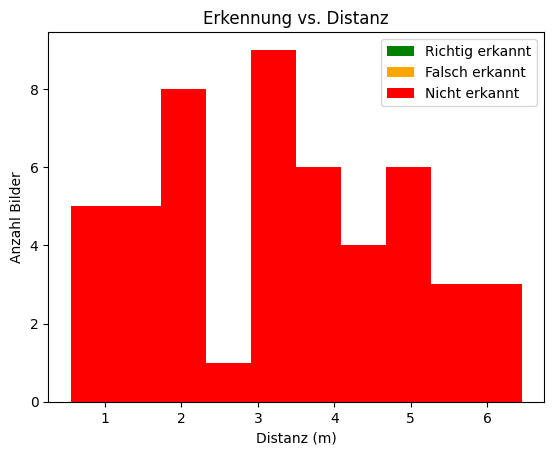

In [21]:
df_stat = auswertung_mit_statistik(model, general_path, date)

## Test auf blauem Hintergrund

In [22]:
date = "auf_blauem_hintergrund_mehr_erkannt"
detect_tennisballs(model, general_path, date, False)


--- Statistische Auswertung ---
Gesamtbilder: 50
Sportsball erkannt: 23
Fehlerkennungen (andere Objekte): 4
Keine Erkennung: 26


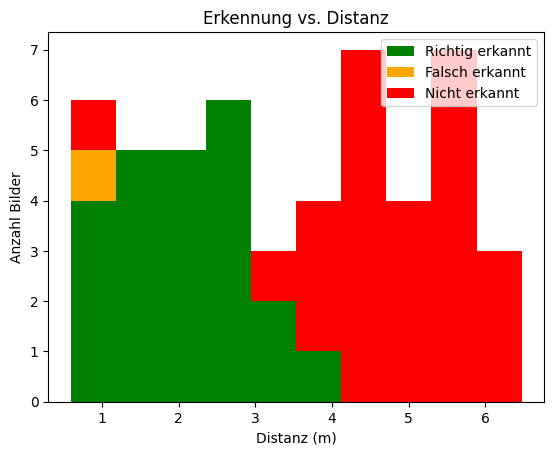

In [23]:
df_stat = auswertung_mit_statistik(model, general_path, date)

## Test mit 200 Screenshots


--- Statistische Auswertung ---
Gesamtbilder: 200
Sportsball erkannt: 87
Fehlerkennungen (andere Objekte): 13
Keine Erkennung: 106


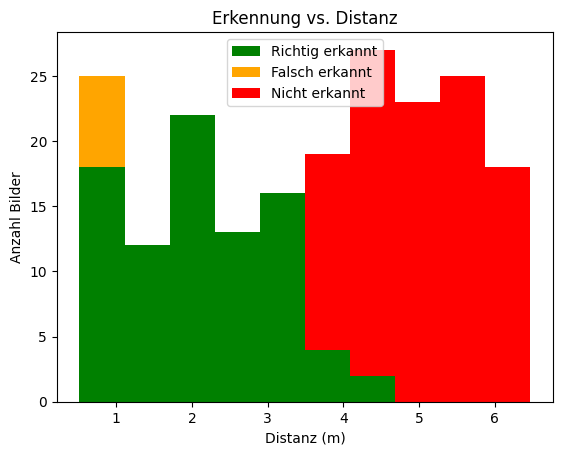

In [24]:
date = "2025-07-01_22-00-21"
detect_tennisballs(model, general_path, date, False)
df_stat = auswertung_mit_statistik(model, general_path, date)